In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

<Axes: >

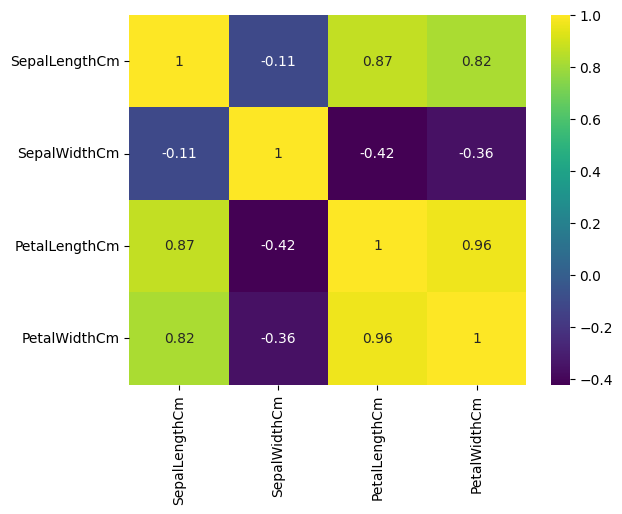

In [8]:
sns.heatmap(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), cmap='viridis', annot=True)

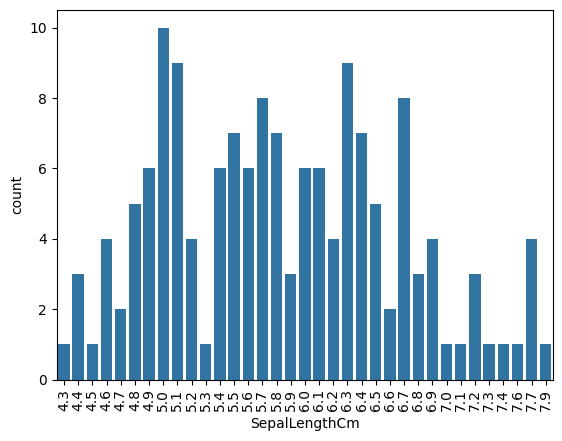

In [9]:
sns.countplot(x='SepalLengthCm', data=df)
plt.xticks(rotation=90)
plt.show()

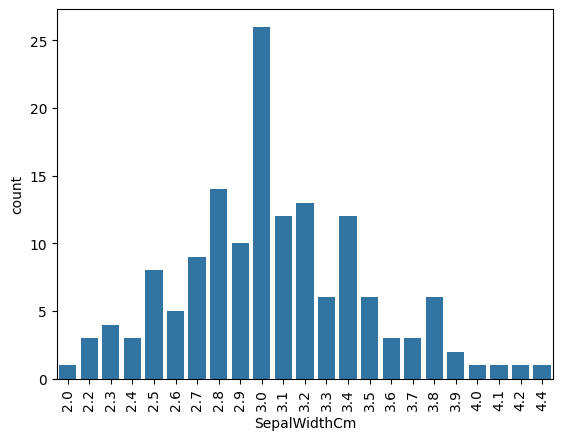

In [10]:
sns.countplot(x='SepalWidthCm', data=df)
plt.xticks(rotation=90)
plt.show()

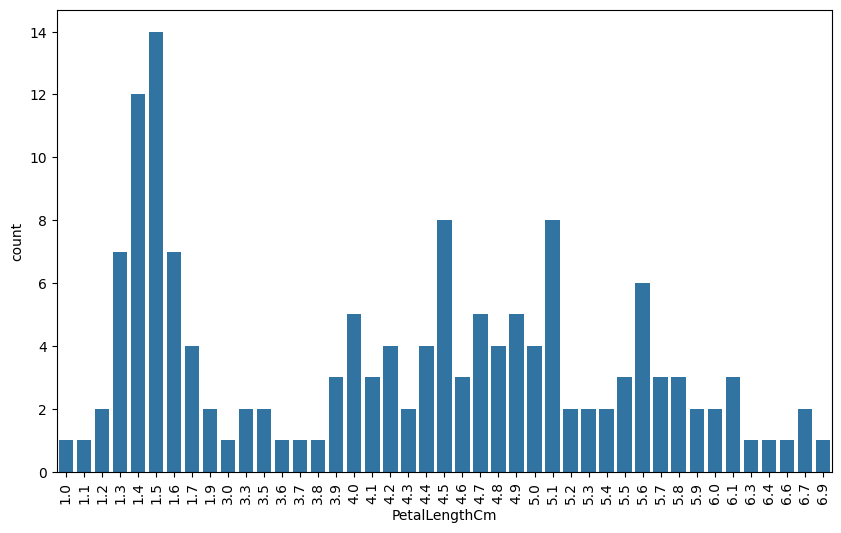

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='PetalLengthCm', data=df)
plt.xticks(rotation=90)
plt.show()

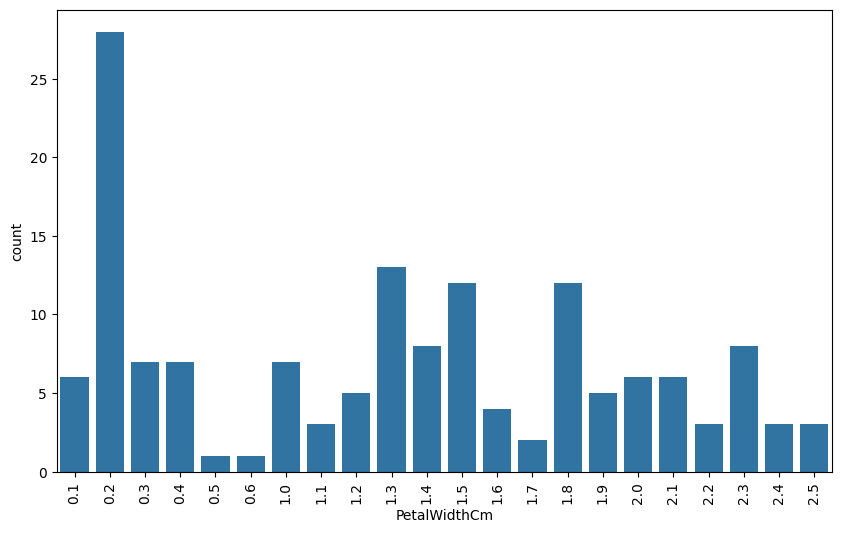

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='PetalWidthCm', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: >

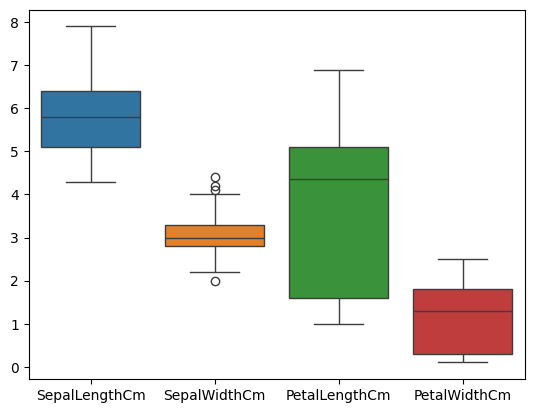

In [13]:
sns.boxplot(df.drop(columns=['Id']))

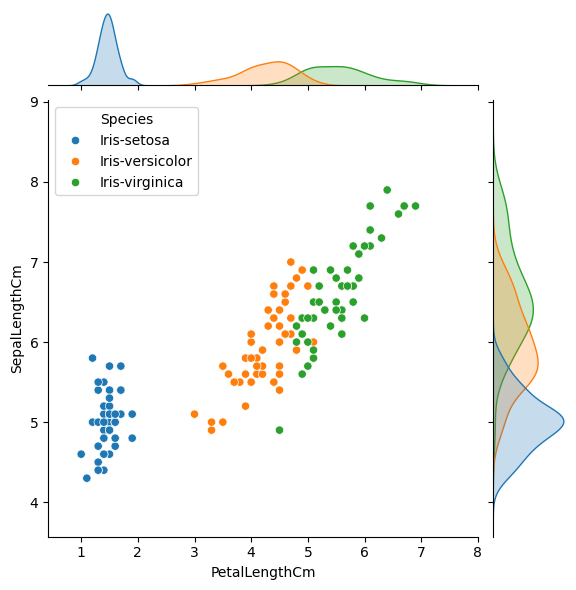

In [14]:
sns.jointplot(x='PetalLengthCm', y='SepalLengthCm', data=df, hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

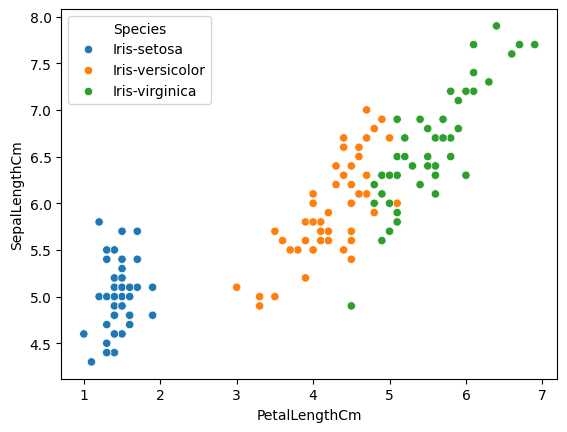

In [15]:
sns.scatterplot(x='PetalLengthCm', y='SepalLengthCm', data=df, hue='Species')

<Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

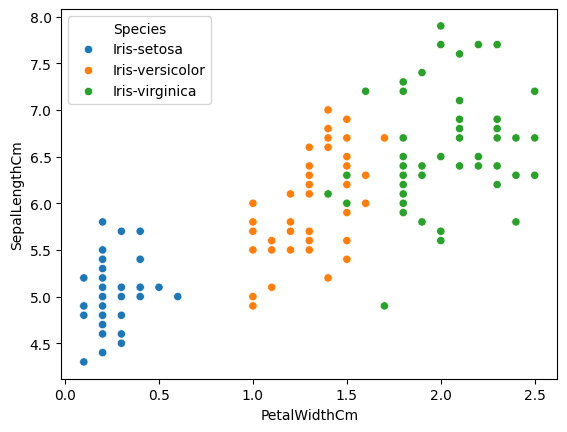

In [16]:
sns.scatterplot(x='PetalWidthCm', y='SepalLengthCm', data=df, hue='Species')

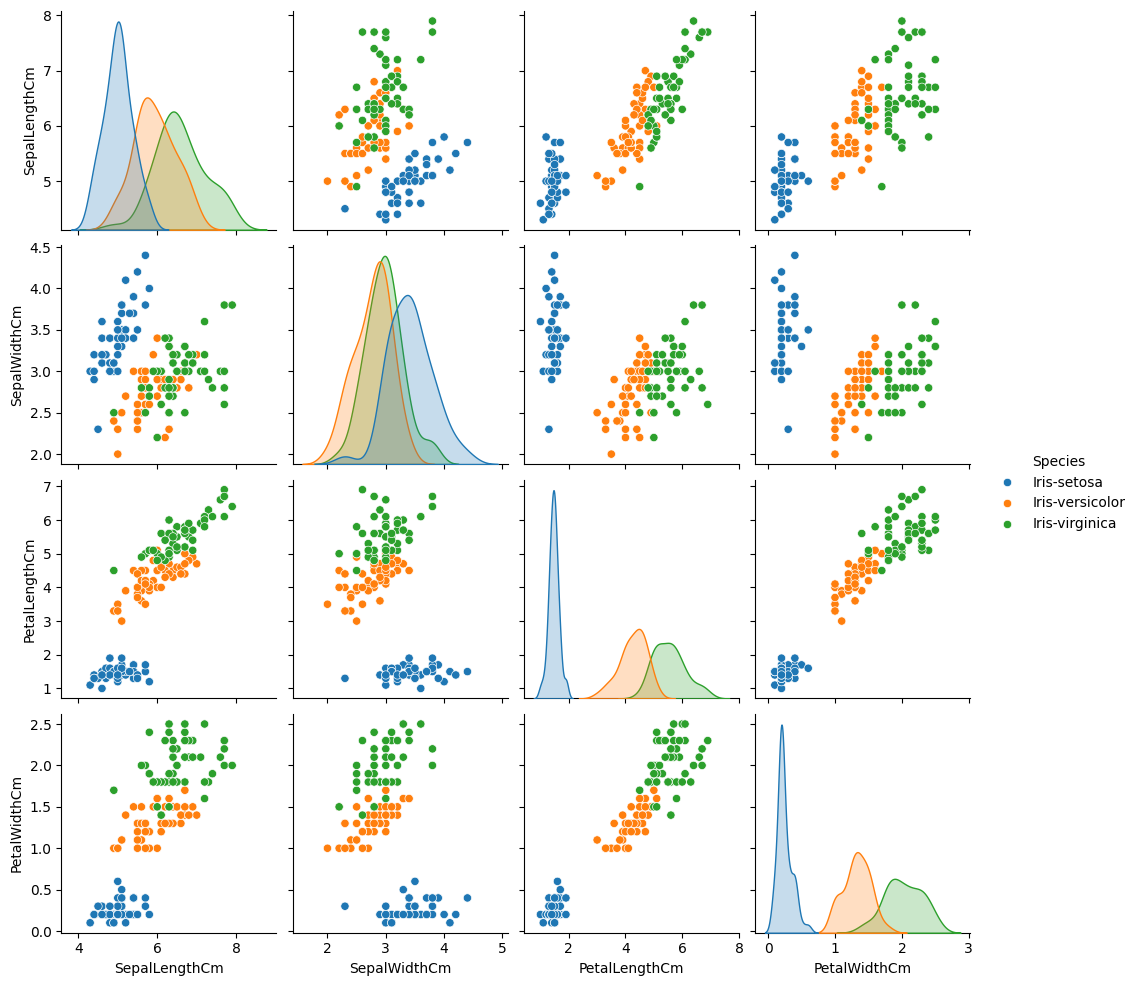

In [17]:
sns.pairplot(df.drop(columns=['Id']), hue='Species')

# Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [19]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [20]:
logr = LogisticRegression()

In [21]:
logr.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred = logr.predict(X_test)

In [23]:
print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [24]:
print(metrics.confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


# Decision Tree

In [25]:
dtree = DecisionTreeClassifier(max_depth=4)

In [26]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [27]:
pred = dtree.predict(X_test)

In [28]:
print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [29]:
print(metrics.confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# Random Forest

In [30]:
rfc = RandomForestClassifier(n_estimators=240)

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=240)

In [48]:
pred = rfc.predict(X_test)

In [49]:
print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [34]:
print(metrics.confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


# SVM

In [37]:
svc = SVC()

In [43]:
svc.fit(X_train, y_train)

SVC()

In [44]:
pred = svc.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [46]:
print(metrics.confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [52]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [53]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.850 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.350 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ...................C=1000, gamma=1;, score=0.900 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.900 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.950 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.800 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.900 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.950 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.950 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.800 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.900 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.950 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [54]:
grid.best_score_

0.96

In [55]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [56]:
svc=SVC(C=100, gamma=0.01)

In [57]:
svc.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [58]:
pred = svc.predict(X_test)

In [59]:
print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [60]:
print(metrics.confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
